In [56]:
import pandas as pd
from scikitplot.metrics import plot_roc
from matplotlib import pyplot as plt

from nya_ml_research.config import DATA_PATH

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
df = pd.read_csv(DATA_PATH / 'reports' / 'model_blanchefortrubertsentiment_dataset_get_kaggle_news.csv')
y_true, y_pred_all_labels = df.y_true, df.iloc[:, 2:]

In [11]:
y_true

0       2
1       2
2       2
3       2
4       2
       ..
8258    1
8259    2
8260    0
8261    2
8262    0
Name: y_true, Length: 8263, dtype: int64

In [12]:
y_pred_all_labels

,neutral,positive,negative
0,0.99195,0.00108,0.00697
1,0.98497,0.00123,0.01381
2,0.99061,0.00121,0.00818
3,0.99008,0.00226,0.00766
4,0.98691,0.00118,0.01191
...,...,...,...
8258,0.99608,0.00217,0.00175
8259,0.92706,0.00485,0.06810
8260,0.99447,0.00343,0.00209
8261,0.98299,0.00092,0.01609


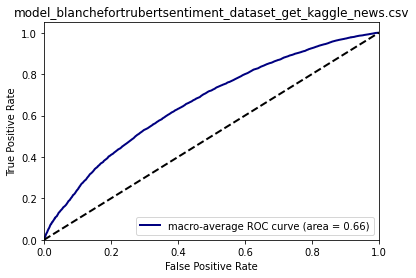

In [55]:
model_blanchefortrubertsentiment_dataset_get_kaggle_news_roc = plot_roc(
    y_true, y_pred_all_labels,
    title="model_blanchefortrubertsentiment_dataset_get_kaggle_news.csv",
    plot_macro=True,

    classes_to_plot=(),
    cmap='rainbow',
    plot_micro=False
)

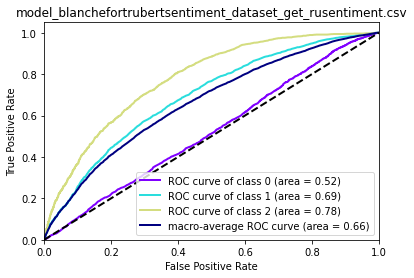

In [59]:
model_blanchefortrubertsentiment_dataset_get_rusentiment_roc = plot_roc(
    y_true, y_pred_all_labels,
    title="model_blanchefortrubertsentiment_dataset_get_rusentiment.csv",
    plot_macro=True,

    # classes_to_plot=(),
    cmap='rainbow',
    plot_micro=False
)

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

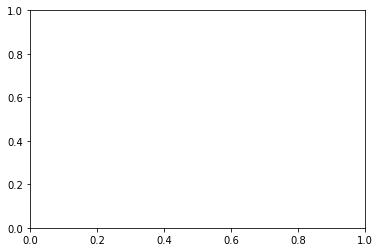

In [57]:
plt.plot(roc)

In [ ]:
(
    roc
        .get_figure()
        .savefig(filepath)
)

In [21]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
preds = y_pred_all_labels
fpr, tpr, threshold = metrics.roc_curve(y_true, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

In [46]:
from sklearn.preprocessing import OneHotEncoder

y_true_onehot = OneHotEncoder().fit_transform(y_true.to_numpy().reshape(-1, 1)).toarray()

In [47]:
y_true_onehot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [48]:
y_pred_all_labels = y_pred_all_labels.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

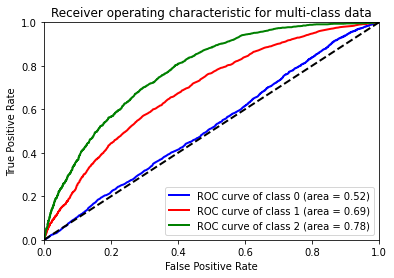

In [52]:
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
lw = 2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_all_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()